## Question parameters

    - Free fall duration: 4 min 27 seconds = 257 seconds 
    - Distance travelled during free fall, D = 42,000 m
    
Before he activated his parachute, Alan's fall is subject to:

    - Earth's gravitational pull (Mg)
    - Air resistance (cv^{2})
 
 
 Notations:
 
     - Alan's Mass, M = 180 kg 
     - Gravitational acceleration, gh = g



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


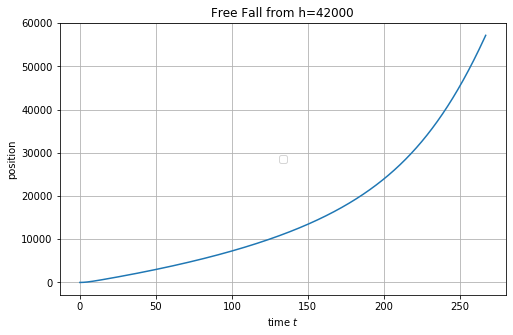

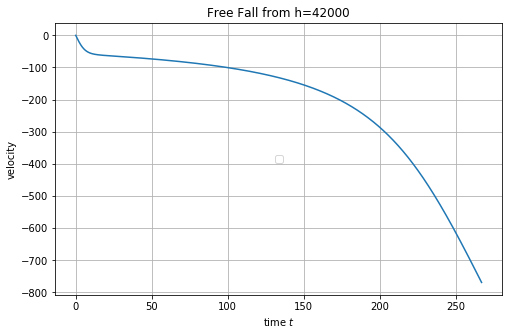

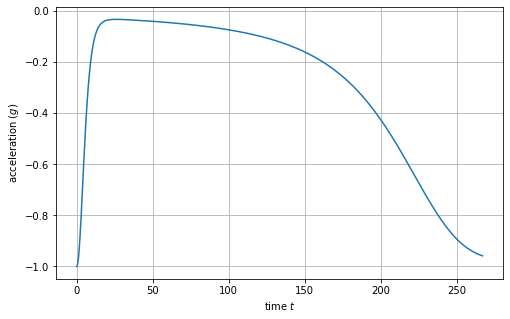

In [87]:
%reset

#import modules 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  # this is needed to integrate the differential equation(s)

# Initalise parameters
M = 180.0     # weight of Alan in Kgs
x0 = 42000.0    # initial height from which Alan falls in meters
Re = 6371000.0  # Earth's mean raidus
g0 = 9.8   #gravitational force at Earth's surface 
t1= 267 #time when he deploys parachute 
t = np.linspace(0.0, t1, 12000) # plot for 10 minutes worth of data 
y0 = [0.0, 0.0] # initial x0 and v0

def model(y, t, M=M):
    
    G1 = -y[1] #velocity value 
    G2 = -(g0*(Re/(Re+y[0]))**2.0) + (0.5*np.exp(-y[0]/6450)/M)*abs(-y[1])*(-y[1])
    
    return [G1, G2]

# integrate equation of motion
ys = odeint(model, y0, t)

#plot position over time 
plt.figure(figsize=(8,5))
plt.xlabel("time $t$")
plt.ylabel("position")
plt.title("Free Fall from h=42000")
plt.legend('velocity', loc=10)

plt.plot(t,ys[:,0])

plt.grid()



#plot distance, velocity over time 
plt.figure(figsize=(8,5))
plt.xlabel("time $t$")
plt.ylabel("velocity")
plt.title("Free Fall from h=42000")
plt.legend('velocity', loc=10)
plt.grid()

plt.plot(t, ys[:,1])

# plot acceleration over time 

a = np.zeros(12000)  

for i in range(len(a)):  
    f = model(ys[i,:], t[i])   
        
    a[i] = f[1]/g0  
    
plt.figure(figsize=(8,5))
plt.xlabel("time $t$")
plt.ylabel("acceleration ($g$)")
plt.grid()
plt.plot(t, a)


plt.show()

In [86]:
np.round(ys[:],2)

array([[ 0.000000e+00,  0.000000e+00],
       [ 0.000000e+00, -2.200000e-01],
       [ 1.000000e-02, -4.400000e-01],
       ...,
       [ 5.713081e+04, -7.684000e+02],
       [ 5.714791e+04, -7.686100e+02],
       [ 5.716502e+04, -7.688200e+02]])

In [ ]:
# plot acceleration over time 

a = np.zeros(200)  

for i in range(len(a)):  
    f = model(ys[i,:], t[i])   
        
    a[i] = f[1]/g0  
    
plt.figure(figsize=(8,5))
plt.xlabel("time $t$")
plt.ylabel("acceleration ($g$)")
plt.grid()
plt.plot(t, a)